## Visualização dos resultados



In [53]:
import struct
import numpy as np
from matplotlib import pyplot as plt



In [102]:
# reading binary data (To do)

with open('output.bin', 'rb') as file:
    [h] = struct.unpack('f', file.read(4))
    N = int.from_bytes(file.read(4), byteorder='little')
    M = int.from_bytes(file.read(4), byteorder='little')

print(h)
print(N)
print(M)

1.0263774730643528e+35
32765
2040406896


In [130]:
# reading ascii data


with open('output.dat', 'r') as file:
    h = float(file.readline())
    N = int(file.readline())
    M = int(file.readline())
    u = np.zeros((N, M), float)

    for j in range(M):
        u[j] = file.readline()[:-2].split(sep=" ")


print(h)
print(N)
print(M)
# print(u)

0.0025
400
400


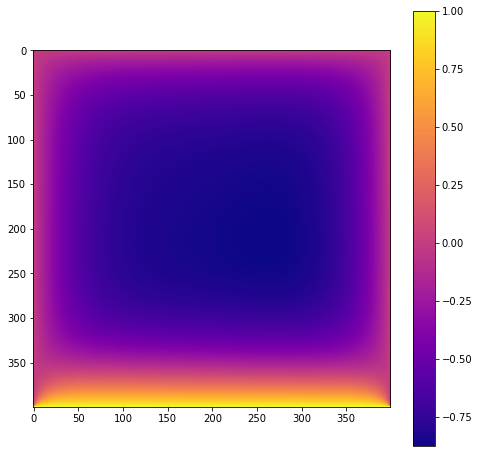

In [133]:
plt.figure(figsize=(8, 8))
plt.imshow(u, cmap='plasma')
plt.colorbar()
plt.show()